In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import warnings

In [11]:
warnings.filterwarnings("ignore")

#### 1) Delivery_time -> Predict delivery time using sorting time 

In [3]:
Delivery = pd.read_csv("C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Assignment/Simple Linear Regression/delivery_time.csv")

In [4]:
Delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
# x = sorting time 
# y = delivery time
# y^ = predicted delivery time

Delivery.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [43]:
Delivery.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [7]:
# correlation between sorting time and delivery time i.e. x and y
Delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

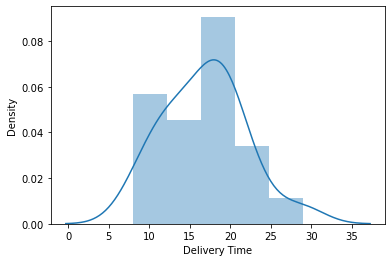

In [12]:
sns.distplot(Delivery["Delivery Time"])

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

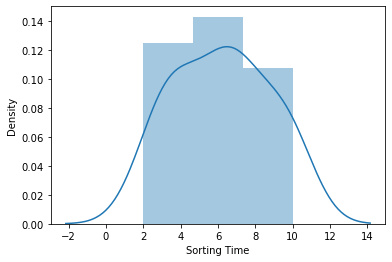

In [13]:
sns.distplot(Delivery["Sorting Time"])

In [24]:
Delivery = Delivery.rename({"Delivery Time":"DeliveryTime"},axis = 1)
Delivery = Delivery.rename({"Sorting Time":"SortingTime"},axis = 1)
Delivery.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


<AxesSubplot:xlabel='SortingTime'>

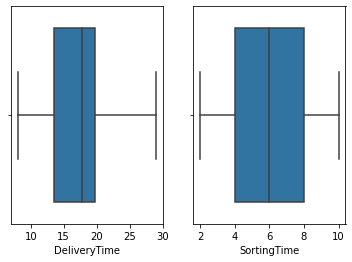

In [41]:
#check for the outliers
plt.subplot(1,2,1)
sns.boxplot(Delivery["DeliveryTime"])
plt.subplot(1,2,2)
sns.boxplot(Delivery["SortingTime"])


<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

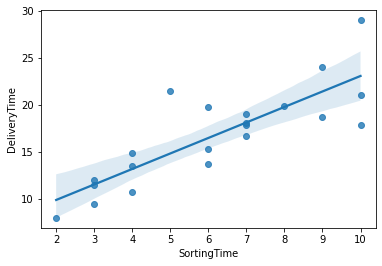

In [27]:
# Fitting the linear regression model
model = smf.ols("DeliveryTime ~ SortingTime", data = Delivery).fit()
sns.regplot(x = "SortingTime", y = "DeliveryTime", data= Delivery)


In [30]:
# Model parameters / Coefficients
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

##### Regression Equation = 6.582734 + 1.649020 * SortingTime

In [31]:
# To validate the model
# t and p-values
print(model.tvalues, "\n", model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [32]:
# R square value
print(model.rsquared)

0.6822714748417231


In [44]:
# Since the R square value, 0.6822714748417231 > 0.65
# The model built is okay to proceed with for predicting the Delivery time for the required sorting time

#### 2) Salary_hike -> Build a prediction model for Salary_hike

In [45]:
Salary = pd.read_csv("C:/Users/preet/OneDrive/Desktop/ExcelR/Data Science/Assignment/Simple Linear Regression/Salary_Data.csv")

In [46]:
Salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [47]:
Salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [48]:
Salary.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

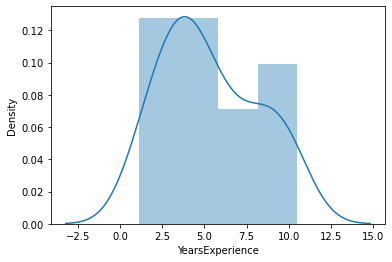

In [49]:
sns.distplot(Salary["YearsExperience"])

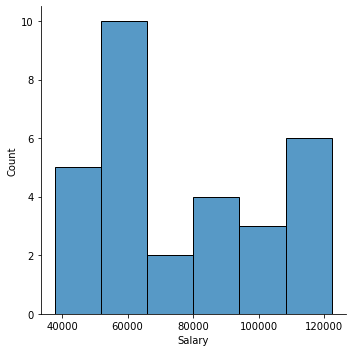

In [51]:
sns.displot(Salary["Salary"])

<AxesSubplot:xlabel='Salary'>

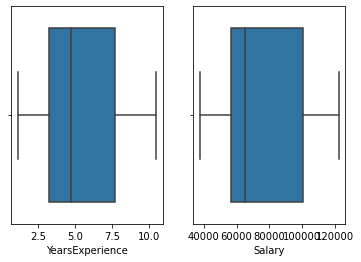

In [54]:
plt.subplot(1,2,1)
sns.boxplot(Salary["YearsExperience"])
plt.subplot(1,2,2)
sns.boxplot(Salary["Salary"])

In [55]:
#correlation
Salary.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

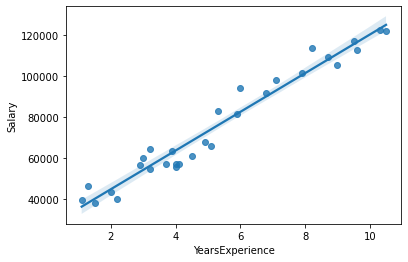

In [59]:
# Fitting the linear Regression Model
model = smf.ols("Salary ~ YearsExperience", data= Salary).fit()
sns.regplot(x = "YearsExperience", y = "Salary", data = Salary)

In [60]:
# Model parameters or coefficients 
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

##### Regression Equation = 25792.200199 + 9449.962321 * YearsExperience

In [61]:
# To check the validation the model
# t values and p-values
print(model.tvalues, "\n", model.pvalues)

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [62]:
# R square value
model.rsquared

0.9569566641435086

In [63]:
# The R square value, 0.9569566641435086 > 0.65
# Hence the Regression model built is excellent enough to proceed with the prediction of Salary for required Years of Experience